In [3]:
import csv
import pandas as pd
import numpy as np
import json
import requests
from  pprint import  pprint
import random
import seaborn as sns
import matplotlib.pyplot as plt
from decimal import *


In [4]:
education = "EDU.csv"
education = pd.read_csv(education, encoding='latin-1')
education.head()

,FIPS Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,"Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2012-2016","High school diploma only, 2012-2016","Some college or associate's degree, 2012-2016","Bachelor's degree or higher, 2012-2016","Percent of adults with less than a high school diploma, 2012-2016","Percent of adults with a high school diploma only, 2012-2016","Percent of adults completing some college or associate's degree, 2012-2016","Percent of adults with a bachelor's degree or higher, 2012-2016"
0,0,US,United States,NaN,NaN,NaN,NaN,"52,373,312","34,158,051","11,650,730",...,27.4,24.4,"27,818,380","58,820,411","62,242,569","64,767,787",13.0,27.5,29.1,30.3
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,"1,062,306","468,269","136,287",...,25.9,19.0,"496,036","1,009,593","972,703","783,076",15.2,31.0,29.8,24.0
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,"6,611","3,757",933,...,26.9,18.0,"4,528","12,519","10,451","8,968",12.4,34.3,28.7,24.6
3,1003,AL,Baldwin County,4.0,5.0,3.0,2.0,"18,726","8,426","2,334",...,29.3,23.1,"13,956","40,154","44,486","41,350",10.0,28.7,31.8,29.5
4,1005,AL,Barbour County,6.0,6.0,6.0,6.0,"8,120","2,242",581,...,21.3,10.9,"4,824","6,422","4,775","2,366",26.2,34.9,26.0,12.9


In [5]:
education2 = pd.DataFrame({"FIPS Code":education['FIPS Code'],
                           "State":education['State'],
                           "Area name":education['Area name'],
                            "Less than a high school diploma, 2012-2016":education['Less than a high school diploma, 2012-2016'],
                           "High school diploma only, 2012-2016":education['High school diploma only, 2012-2016'],
                           "Some college or associate's degree, 2012-2016":education["Some college or associate's degree, 2012-2016"],
                           "Bachelor's degree or higher, 2012-2016": education["Bachelor's degree or higher, 2012-2016"],
                           "Percent of adults with less than a high school diploma, 2012-2016": education["Percent of adults with less than a high school diploma, 2012-2016"],
                           "Percent of adults with a high school diploma only, 2012-2016":education["Percent of adults with a high school diploma only, 2012-2016"],
                           "Percent of adults completing some college or associate's degree, 2012-2016":education["Percent of adults completing some college or associate's degree, 2012-2016"],
                           "Percent of adults with a bachelor's degree or higher, 2012-2016":education["Percent of adults with a bachelor's degree or higher, 2012-2016"]
    
                          })

education2 = education2[["FIPS Code", "State", "Area name", "Less than a high school diploma, 2012-2016", "High school diploma only, 2012-2016", "Some college or associate's degree, 2012-2016", "Bachelor's degree or higher, 2012-2016", "Percent of adults with less than a high school diploma, 2012-2016", "Percent of adults with a high school diploma only, 2012-2016", "Percent of adults completing some college or associate's degree, 2012-2016", "Percent of adults with a bachelor's degree or higher, 2012-2016"]]
education2.head()

,FIPS Code,State,Area name,"Less than a high school diploma, 2012-2016","High school diploma only, 2012-2016","Some college or associate's degree, 2012-2016","Bachelor's degree or higher, 2012-2016","Percent of adults with less than a high school diploma, 2012-2016","Percent of adults with a high school diploma only, 2012-2016","Percent of adults completing some college or associate's degree, 2012-2016","Percent of adults with a bachelor's degree or higher, 2012-2016"
0,0,US,United States,"27,818,380","58,820,411","62,242,569","64,767,787",13.0,27.5,29.1,30.3
1,1000,AL,Alabama,"496,036","1,009,593","972,703","783,076",15.2,31.0,29.8,24.0
2,1001,AL,Autauga County,"4,528","12,519","10,451","8,968",12.4,34.3,28.7,24.6
3,1003,AL,Baldwin County,"13,956","40,154","44,486","41,350",10.0,28.7,31.8,29.5
4,1005,AL,Barbour County,"4,824","6,422","4,775","2,366",26.2,34.9,26.0,12.9


In [6]:
#Convert State to name
us_state_abbrev = {
    "AL":"Alabama",
    "AK":"Alaska",
    "AZ":"Arizona",
    "AR":"Arkansas",
    "CA":"California",
    "CO":"Colorado",
    "CT":"Connecticut",
    "DE":"Delaware",
    "FL":"Florida",
    "GA":"Georgia",
    "HI":"Hawaii",
    "ID":"Idaho",
   "IL":"Illinois",
    "IN":"Indiana",
    "IA":"Iowa",
    "KS":"Kansas",
    "KY":"Kentucky",
    "LA":"Louisiana",
    "ME":"Maine",
    "MD":"Maryland",
    "MA":"Massachusetts",
    "MI":"Michigan",
    "MN":"Minnesota",
    "MS":"Mississippi",
    "MO":"Missouri",
    "MT":"Montana",
    "NE":"Nebraska",
    "NV":"Nevada",
    "NH":"New Hampshire",
    "NJ":"New Jersey",
    "NM":"New Mexico",
    "NY":"New York",
    "NC":"North Carolina",
    "ND":"North Dakota",
    "OH":"Ohio",
    "OK":"Oklahoma",
    "OR":"Oregon",
    "PA":"Pennsylvania",
    "RI":"Rhode Island",
    "SC":"South Carolina",
    "SD":"South Dakota",
    "TN":"Tennessee",
    "TX":"Texas",
    "UT":"Utah",
    "VT":"Vermont",
    "VA":"Virginia",
    "WA":"Washington",
    "WV":"West Virginia",
    "WI":"Wisconsin",
    "WY":"Wyoming",
}

education2['State'] = education2['State'].map(us_state_abbrev)
#education2['State']=[us_state_abbrev.get(item,item) for item in education2['State']]

education2.head()

,FIPS Code,State,Area name,"Less than a high school diploma, 2012-2016","High school diploma only, 2012-2016","Some college or associate's degree, 2012-2016","Bachelor's degree or higher, 2012-2016","Percent of adults with less than a high school diploma, 2012-2016","Percent of adults with a high school diploma only, 2012-2016","Percent of adults completing some college or associate's degree, 2012-2016","Percent of adults with a bachelor's degree or higher, 2012-2016"
0,0,NaN,United States,"27,818,380","58,820,411","62,242,569","64,767,787",13.0,27.5,29.1,30.3
1,1000,Alabama,Alabama,"496,036","1,009,593","972,703","783,076",15.2,31.0,29.8,24.0
2,1001,Alabama,Autauga County,"4,528","12,519","10,451","8,968",12.4,34.3,28.7,24.6
3,1003,Alabama,Baldwin County,"13,956","40,154","44,486","41,350",10.0,28.7,31.8,29.5
4,1005,Alabama,Barbour County,"4,824","6,422","4,775","2,366",26.2,34.9,26.0,12.9


In [7]:
education2["county_string"] = education2["Area name"] + ", " + education2["State"]


In [8]:
education2 = education2[["FIPS Code", "county_string", "Less than a high school diploma, 2012-2016", "High school diploma only, 2012-2016", "Some college or associate's degree, 2012-2016", "Bachelor's degree or higher, 2012-2016", "Percent of adults with less than a high school diploma, 2012-2016", "Percent of adults with a high school diploma only, 2012-2016", "Percent of adults completing some college or associate's degree, 2012-2016", "Percent of adults with a bachelor's degree or higher, 2012-2016"]]
education2.head()

,FIPS Code,county_string,"Less than a high school diploma, 2012-2016","High school diploma only, 2012-2016","Some college or associate's degree, 2012-2016","Bachelor's degree or higher, 2012-2016","Percent of adults with less than a high school diploma, 2012-2016","Percent of adults with a high school diploma only, 2012-2016","Percent of adults completing some college or associate's degree, 2012-2016","Percent of adults with a bachelor's degree or higher, 2012-2016"
0,0,NaN,"27,818,380","58,820,411","62,242,569","64,767,787",13.0,27.5,29.1,30.3
1,1000,"Alabama, Alabama","496,036","1,009,593","972,703","783,076",15.2,31.0,29.8,24.0
2,1001,"Autauga County, Alabama","4,528","12,519","10,451","8,968",12.4,34.3,28.7,24.6
3,1003,"Baldwin County, Alabama","13,956","40,154","44,486","41,350",10.0,28.7,31.8,29.5
4,1005,"Barbour County, Alabama","4,824","6,422","4,775","2,366",26.2,34.9,26.0,12.9


In [9]:
#reading in county data
counties=pd.read_csv("acs2015_county_data.csv")
counties["county_string"] = counties["County"] + " County, " + counties["State"]
listofcounties = counties["county_string"].tolist()
#reading in zipcodes
zipcodes=pd.read_csv("zip_codes_states.csv")
zipcodes["county_string"] = zipcodes["county"] + " County, " + zipcodes["state"]
listofzipcodes=zipcodes["county_string"].unique().tolist()
counties.to_csv("counties.csv")
zipcodes.to_csv("zcs.csv")
fullcountylist = list(set(listofcounties) & set(listofzipcodes))
counties.head(1)

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,county_string
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6,"Autauga County, Alabama"


In [10]:
#creating regions
WC = ["Washington","Oregon","California","Nevada","Idaho"]
MW = ["Montana","Wyoming","North Dakota","South Dakota","Nebraska","Kansas","Minnesota","Iowa","Missouri",
      "Wisconsin","Illinois","Michigan","Indiana","Ohio","Kentucky"]
SW = ["Arizona","Utah","Colorado","New Mexico","Oklahoma","Texas"]
SE = ["Arkansas","Louisiana","Mississippi","Alabama","Tennessee","Virginia","West Virginia","North Carolina","South Carolina","Georgia","Florida"]
NE = ["District of Columbia","Pennsylvania","Maryland","Delaware","New Jersey","New York","Maine","New Hampshire","Vermont","Massachusetts","Rhode Island","Connecticut"]
counties["Region"]= np.where(counties["State"].isin(WC),'WC',
                    np.where(counties["State"].isin(MW),'MW',
                    np.where(counties["State"].isin(SW),'SW',
                    np.where(counties["State"].isin(SE),'SE',
                    np.where(counties["State"].isin(NE),'NE', 
                             'other')))))

In [11]:
#counties.groupby(["Region"]).sum()["TotalPop"]
cdf = pd.DataFrame(counties,columns=["county_string","Region"])
WClist = (cdf.groupby("Region").get_group("WC")["county_string"]).tolist()
MWlist = (cdf.groupby("Region").get_group("MW")["county_string"]).tolist()
SWlist = (cdf.groupby("Region").get_group("SW")["county_string"]).tolist()
SElist = (cdf.groupby("Region").get_group("SE")["county_string"]).tolist()
NElist = (cdf.groupby("Region").get_group("NE")["county_string"]).tolist()

sample_list = []
sample_list.extend(random.sample(list(set(WClist) & set(fullcountylist)),2))
sample_list.extend(random.sample(list(set(MWlist) & set(fullcountylist)),2))
sample_list.extend(random.sample(list(set(SWlist) & set(fullcountylist)),2))
sample_list.extend(random.sample(list(set(SElist) & set(fullcountylist)),2))
sample_list.extend(random.sample(list(set(NElist) & set(fullcountylist)),2))
sample_list

['Grant County, Oregon',
 'Lane County, Oregon',
 'Washington County, Kansas',
 'Wood County, Ohio',
 'Fannin County, Texas',
 'Tyler County, Texas',
 'Greensville County, Virginia',
 'Sevier County, Tennessee',
 'Schuylkill County, Pennsylvania',
 'Venango County, Pennsylvania']

In [12]:
res_df = pd.DataFrame(columns=["name","zipcode","county_string","rating","review_count","category","price"])
res_df

,name,zipcode,county_string,rating,review_count,category,price


In [13]:
r = 0
for c in sample_list:
    county_string = str(c)
    for term in ["Italian","Mexican","Chinese","American","Indian"]:
        #we are allowed 5000 queries per 24 hours. if we run out, we can create another. till then, use this
        yelpkey="IXRN_1GI8f8J9Kj5O5GciqeyFSWR5RMh41_rADGy1KrtQ5ZABGGZEkWwot5mOka0NlzlNxXPmzYXLWk88oOV0N_YxD1MSW4kQRfJnFrwfHLtKrr2HcsjLo6uWBzAWnYx"
        try:
            offset=0
            for loopcount in range(5):
                
                response = requests.get(url="https://api.yelp.com/v3/businesses/search", 
                       params= {"location": county_string,"term": term, "limit":"50", "offset": offset}, 
                       headers={'Authorization': 'bearer %s' % yelpkey})
                responsejson = response.json()
                offset += 50
                try:
                    count=0
            
                    for x in range(0,49):
                        for y in range(0,len(responsejson["businesses"][x]["categories"])):
                            
                            if ((str(responsejson["businesses"][x]["categories"][y]["title"]).startswith(str(term))) and 
                                (responsejson["businesses"][x]["review_count"] > 0)):
                        
                                zc = int(responsejson["businesses"][x]["location"]["zip_code"])
                                if (zipcodes.loc[zipcodes["zip_code"]==zc]["county_string"].tolist()[0]== county_string):
                            
#                                     print("\n",responsejson["businesses"][x]["name"],
#                                           responsejson["businesses"][x]["location"]["zip_code"],
#                                           zipcodes.loc[zipcodes["zip_code"]==zc]["county_string"].tolist()[0],
#                                           responsejson["businesses"][x]["rating"],
#                                           responsejson["businesses"][x]["review_count"],
#                                           responsejson["businesses"][x]["categories"][y]["title"])
                            
                                    res_df.loc[r]=[responsejson["businesses"][x]["name"],
                                          str(zc),
                                          county_string,
                                          responsejson["businesses"][x]["rating"],
                                          responsejson["businesses"][x]["review_count"],
                                          term,
                                          responsejson["businesses"][x]["price"]]
                                          #responsejson["businesses"][x]["price"]]
                                    count += 1
                                    r += 1
                except:
                    break
    
                print("End of list. Found", count, term, "restaurants in", county_string)
        except:
            break


End of list. Found 35 Chinese restaurants in Lane County, Oregon
End of list. Found 0 American restaurants in Washington County, Kansas
End of list. Found 3 Mexican restaurants in Tyler County, Texas
End of list. Found 0 Mexican restaurants in Tyler County, Texas
End of list. Found 6 American restaurants in Tyler County, Texas
End of list. Found 0 American restaurants in Tyler County, Texas
End of list. Found 0 American restaurants in Tyler County, Texas
End of list. Found 0 Italian restaurants in Greensville County, Virginia
End of list. Found 0 Italian restaurants in Greensville County, Virginia
End of list. Found 0 Chinese restaurants in Greensville County, Virginia
End of list. Found 1 American restaurants in Greensville County, Virginia
End of list. Found 0 American restaurants in Greensville County, Virginia
End of list. Found 0 American restaurants in Greensville County, Virginia
End of list. Found 0 American restaurants in Greensville County, Virginia
End of list. Found 0 Ameri

In [14]:

res_df.to_csv("output1804042050.csv")
res_df.price.replace(["$","$$","$$$","$$$$"],[1,2,3,4],inplace=True)
res_df.head()



,name,zipcode,county_string,rating,review_count,category,price
0,Figaro's Pizza,97845,"Grant County, Oregon",3.0,5,Italian,2
1,El Cocinero,97869,"Grant County, Oregon",4.5,4,Mexican,1
2,1080 Pub,97845,"Grant County, Oregon",4.5,2,American,1
3,"The Outpost Pizza, Pub, & Grill",97845,"Grant County, Oregon",4.5,18,American,2
4,Squeeze-In Restaurant & Deck,97845,"Grant County, Oregon",4.0,37,American,2


In [15]:
#Merged the data with the counties CSV file

merged= pd.merge(res_df,counties, how='left', on="county_string",)

# created DataFrame with limited fields
newdf1= merged[['category', 'Region','county_string', 'price','rating', 'review_count','Income']]
print(newdf1.columns)
# summing the review count
gdf= newdf1.groupby(['category', 'Region','price','rating','Income'])['review_count'].sum()
gdf.head(200)
gdf.to_csv('newdf1.csv', header=True)
newdf = pd.read_csv("newdf1.csv")
newdf.head()

Index(['category', 'Region', 'county_string', 'price', 'rating',
       'review_count', 'Income'],
      dtype='object')


,category,Region,price,rating,Income,review_count
0,American,MW,2,4.5,53577.0,50
1,American,NE,1,3.0,43644.0,4
2,American,NE,1,4.0,43644.0,5
3,American,NE,1,4.5,43644.0,10
4,American,NE,2,3.5,43644.0,10


In [16]:
newdf5=newdf[["category","Region","price","rating"]]
# New column Income calc expressing the income in thousands for showing better on a bar plot
newdf6= newdf[["category","Region","review_count"]]
newdf6["Incomecalc"]= newdf["Income"]/100

newdf5.head()

C:\Users\kfw32\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,category,Region,price,rating
0,American,MW,2,4.5
1,American,NE,1,3.0
2,American,NE,1,4.0
3,American,NE,1,4.5
4,American,NE,2,3.5


In [17]:
merged1= pd.merge(res_df,education2, how='left', on="county_string")
merged1.head()

,name,zipcode,county_string,rating,review_count,category,price,FIPS Code,"Less than a high school diploma, 2012-2016","High school diploma only, 2012-2016","Some college or associate's degree, 2012-2016","Bachelor's degree or higher, 2012-2016","Percent of adults with less than a high school diploma, 2012-2016","Percent of adults with a high school diploma only, 2012-2016","Percent of adults completing some college or associate's degree, 2012-2016","Percent of adults with a bachelor's degree or higher, 2012-2016"
0,Figaro's Pizza,97845,"Grant County, Oregon",3.0,5,Italian,2,41023,569,"1,747","1,982","1,193",10.4,31.8,36.1,21.7
1,El Cocinero,97869,"Grant County, Oregon",4.5,4,Mexican,1,41023,569,"1,747","1,982","1,193",10.4,31.8,36.1,21.7
2,1080 Pub,97845,"Grant County, Oregon",4.5,2,American,1,41023,569,"1,747","1,982","1,193",10.4,31.8,36.1,21.7
3,"The Outpost Pizza, Pub, & Grill",97845,"Grant County, Oregon",4.5,18,American,2,41023,569,"1,747","1,982","1,193",10.4,31.8,36.1,21.7
4,Squeeze-In Restaurant & Deck,97845,"Grant County, Oregon",4.0,37,American,2,41023,569,"1,747","1,982","1,193",10.4,31.8,36.1,21.7


In [18]:
educat = merged1[["county_string", "category", "review_count", "price", "Less than a high school diploma, 2012-2016", "High school diploma only, 2012-2016", "Some college or associate's degree, 2012-2016", "Bachelor's degree or higher, 2012-2016"]]
educat.head()

,county_string,category,review_count,price,"Less than a high school diploma, 2012-2016","High school diploma only, 2012-2016","Some college or associate's degree, 2012-2016","Bachelor's degree or higher, 2012-2016"
0,"Grant County, Oregon",Italian,5,2,569,"1,747","1,982","1,193"
1,"Grant County, Oregon",Mexican,4,1,569,"1,747","1,982","1,193"
2,"Grant County, Oregon",American,2,1,569,"1,747","1,982","1,193"
3,"Grant County, Oregon",American,18,2,569,"1,747","1,982","1,193"
4,"Grant County, Oregon",American,37,2,569,"1,747","1,982","1,193"


In [19]:
educat1 = merged1[["category", "county_string", "review_count", "price", "Percent of adults with less than a high school diploma, 2012-2016", "Percent of adults with a high school diploma only, 2012-2016", "Percent of adults completing some college or associate's degree, 2012-2016", "Percent of adults with a bachelor's degree or higher, 2012-2016"]]
educat1.head()

,category,county_string,review_count,price,"Percent of adults with less than a high school diploma, 2012-2016","Percent of adults with a high school diploma only, 2012-2016","Percent of adults completing some college or associate's degree, 2012-2016","Percent of adults with a bachelor's degree or higher, 2012-2016"
0,Italian,"Grant County, Oregon",5,2,10.4,31.8,36.1,21.7
1,Mexican,"Grant County, Oregon",4,1,10.4,31.8,36.1,21.7
2,American,"Grant County, Oregon",2,1,10.4,31.8,36.1,21.7
3,American,"Grant County, Oregon",18,2,10.4,31.8,36.1,21.7
4,American,"Grant County, Oregon",37,2,10.4,31.8,36.1,21.7


In [20]:
educatok=educat.groupby(["category", "county_string"])['category'].count()
educatok.head()

category  county_string                  
American  Fannin County, Texas                2
          Grant County, Oregon                6
          Greensville County, Virginia        1
          Lane County, Oregon                10
          Schuylkill County, Pennsylvania     1
Name: category, dtype: int64

In [21]:
educatmaybe=educat.groupby(["category", "county_string", "Less than a high school diploma, 2012-2016", "High school diploma only, 2012-2016", "Some college or associate's degree, 2012-2016", "Some college or associate's degree, 2012-2016", "Bachelor's degree or higher, 2012-2016"])['category'].count()
educatmaybe.head()

category  county_string                    Less than a high school diploma, 2012-2016  High school diploma only, 2012-2016  Some college or associate's degree, 2012-2016  Some college or associate's degree, 2012-2016  Bachelor's degree or higher, 2012-2016
American  Fannin County, Texas             4,019                                       8,238                                7,747                                          7,747                                          3,706                                      2
          Grant County, Oregon             569                                         1,747                                1,982                                          1,982                                          1,193                                      6
          Greensville County, Virginia     2,028                                       3,630                                2,266                                          2,266                                         

In [22]:
educatb=educat.groupby(["category", "county_string","Bachelor's degree or higher, 2012-2016"])["category"].count()
print(educatb)

category  county_string                    Bachelor's degree or higher, 2012-2016
American  Fannin County, Texas             3,706                                      2
          Grant County, Oregon             1,193                                      6
          Greensville County, Virginia     736                                        1
          Lane County, Oregon              70,002                                    10
          Schuylkill County, Pennsylvania  16,260                                     1
          Sevier County, Tennessee         11,686                                    11
          Tyler County, Texas              1,700                                      6
          Venango County, Pennsylvania     6,374                                      8
          Wood County, Ohio                25,229                                     1
Chinese   Fannin County, Texas             3,706                                      1
          Lane County, Oregon         

In [23]:
#So in the education dataframe, all of the numbers were objects with base-10. Apparently, this is a difficult string type
#to convert to float or integers.
#This could maybe be fixed by manipulating the raw data, such as
#reading a csv into excel and converting to Numeric type/removing commas then exporting again. 
#After trouble-shooting in jupyter I just totaled the needed data. 

In [24]:
educatb.head(200)
educatb.to_csv('educatb.csv', header=True)
educatb1 = pd.read_csv("educatb.csv")
                       #,converters={"Bachelor's degree or higher, 2012-2016":int})
educatb1.head()

,category,county_string,"Bachelor's degree or higher, 2012-2016",category.1
0,American,"Fannin County, Texas","3,706",2
1,American,"Grant County, Oregon","1,193",6
2,American,"Greensville County, Virginia",736,1
3,American,"Lane County, Oregon","70,002",10
4,American,"Schuylkill County, Pennsylvania","16,260",1


In [30]:
#educatb1["Bachelor's degree or higher, 2012-2016"] = educatb1["Bachelor's degree or higher, 2012-2016"].apply(Decimal)

In [31]:
s = educatb1["Bachelor's degree or higher, 2012-2016"]
#int(Decimal(str((s))))

In [36]:
s = educatb1["Bachelor's degree or higher, 2012-2016"]
s = (s.replace(",", ""))
#s = float(s)

In [37]:
s = educatb1["Bachelor's degree or higher, 2012-2016"]
s = ''.join(c for c in s if c.isnumeric())
int(s)

736728

In [38]:
educatb1.dtypes

category                                  object
county_string                             object
Bachelor's degree or higher, 2012-2016    object
category.1                                 int64
dtype: object

In [39]:
#educatb1["Bachelor's degree or higher, 2012-2016"] = pd.to_numeric(educatb1["Bachelor's degree or higher, 2012-2016"], errors='coerce')
#educatb1.dtypes

In [40]:
Chinese = educatb1.loc[educatb1["category"] == "Chinese"]
Chineseb = np.sum(Chinese["Bachelor's degree or higher, 2012-2016"])
Chineseb

'3,70670,00216,26011,6861,7006,37425,229'

In [41]:
Chinese = educatb1.loc[educatb1["category"] == "Chinese"]
Chineseb = Chinese["Bachelor's degree or higher, 2012-2016"].sum()
Chineseb

'3,70670,00216,26011,6861,7006,37425,229'

In [42]:
#^Do that 3 more times for each level of education. 
educatsomeb=educat.groupby(["category", "county_string","Some college or associate's degree, 2012-2016"])['category'].count()
educatsomeb.head(200)
educatsomeb.to_csv('educatsomeb.csv', header=True)
educatsomeb1 = pd.read_csv("educatsomeb.csv")
educatsomeb1

,category,county_string,"Some college or associate's degree, 2012-2016",category.1
0,American,"Fannin County, Texas","7,747",2
1,American,"Grant County, Oregon","1,982",6
2,American,"Greensville County, Virginia","2,266",1
3,American,"Lane County, Oregon","92,081",10
4,American,"Schuylkill County, Pennsylvania","26,425",1
5,American,"Sevier County, Tennessee","19,257",11
6,American,"Tyler County, Texas","4,549",6
7,American,"Venango County, Pennsylvania","8,929",8
8,American,"Wood County, Ohio","24,675",1
9,Chinese,"Fannin County, Texas","7,747",1


In [43]:
educaths=educat.groupby(["category", "county_string","High school diploma only, 2012-2016"])['category'].count()
educaths.head(200)
educaths.to_csv('educaths.csv', header=True)
educaths1 = pd.read_csv("educaths.csv")
educaths1

,category,county_string,"High school diploma only, 2012-2016",category.1
0,American,"Fannin County, Texas","8,238",2
1,American,"Grant County, Oregon","1,747",6
2,American,"Greensville County, Virginia","3,630",1
3,American,"Lane County, Oregon","60,355",10
4,American,"Schuylkill County, Pennsylvania","50,617",1
5,American,"Sevier County, Tennessee","24,724",11
6,American,"Tyler County, Texas","6,428",6
7,American,"Venango County, Pennsylvania","19,020",8
8,American,"Wood County, Ohio","25,012",1
9,Chinese,"Fannin County, Texas","8,238",1


In [44]:
educatsomehs=educat.groupby(["category", "county_string","Less than a high school diploma, 2012-2016"])['category'].count()
educatsomehs.head(200)
educatsomehs.to_csv('educatsomehs.csv', header=True)
educatsomehs1 = pd.read_csv("educatsomehs.csv")
educatsomehs1

,category,county_string,"Less than a high school diploma, 2012-2016",category.1
0,American,"Fannin County, Texas","4,019",2
1,American,"Grant County, Oregon",569,6
2,American,"Greensville County, Virginia","2,028",1
3,American,"Lane County, Oregon","21,640",10
4,American,"Schuylkill County, Pennsylvania","12,860",1
5,American,"Sevier County, Tennessee","10,979",11
6,American,"Tyler County, Texas","2,336",6
7,American,"Venango County, Pennsylvania","4,283",8
8,American,"Wood County, Ohio","4,714",1
9,Chinese,"Fannin County, Texas","4,019",1


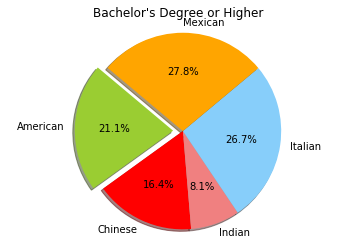

In [45]:
#BA or higher
labels = ["American", "Chinese", "Indian", "Italian", "Mexican"]
sizes = [36780, 28605, 14107, 46541, 48571]
colors = ["yellowgreen", "red", "lightcoral", "lightskyblue", "orange"]
explode = (0.1, 0, 0, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Bachelor's Degree or Higher")
plt.savefig("NumpyBAcat.png")
plt.show()

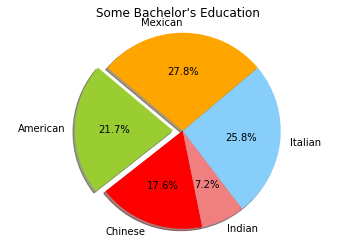

In [46]:
#Some BA
labels = ["American", "Chinese", "Indian", "Italian", "Mexican"]
sizes = [59042, 47869, 19534, 70057, 75502]
colors = ["yellowgreen", "red", "lightcoral", "lightskyblue", "orange"]
explode = (0.1, 0, 0, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Some Bachelor's Education")
plt.savefig("NumpySomeBAcat.png")
plt.show()

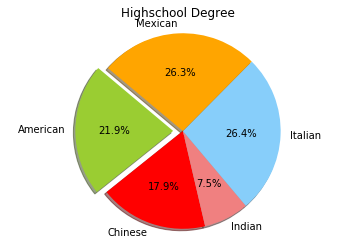

In [47]:
#Highschool
labels = ["American", "Chinese", "Indian", "Italian", "Mexican"]
sizes = [64633, 52953, 22126, 78161, 77821]
colors = ["yellowgreen", "red", "lightcoral", "lightskyblue", "orange"]
explode = (0.1, 0, 0, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Highschool Degree")
plt.savefig("NumpyHScat.png")
plt.show()

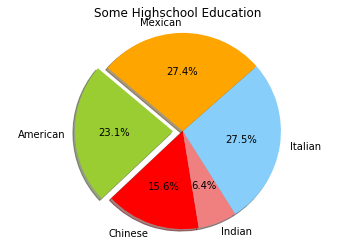

In [48]:
#Some Highschool
labels = ["American", "Chinese", "Indian", "Italian", "Mexican"]
sizes = [33727, 22716, 9300, 40119, 39958]
colors = ["yellowgreen", "red", "lightcoral", "lightskyblue", "orange"]
explode = (0.1, 0, 0, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Some Highschool Education")
plt.savefig("NumpySomeHScat.png")
plt.show()